In [1]:
pip install yfinance

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define the ticker symbol
ticker_symbol = 'AAPL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
# We'll get data for a few years to have a decent amount of historical data.
df = ticker_data.history(period='5y')

# Display the first few rows of the dataframe
print(df.head())

# Save the data to a CSV file for future use (optional)
df.to_csv('AAPL_stock_data.csv')

                                 Open        High         Low       Close  \
Date                                                                        
2020-10-26 00:00:00-04:00  110.899574  113.370278  109.800398  111.911201   
2020-10-27 00:00:00-04:00  112.339190  114.080356  111.415111  113.418907   
2020-10-28 00:00:00-04:00  111.911183  112.280813  108.068944  108.166214   
2020-10-29 00:00:00-04:00  109.304291  113.739881  109.138923  112.173805   
2020-10-30 00:00:00-04:00  108.030044  108.934672  104.781170  105.890068   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-10-26 00:00:00-04:00  111850700        0.0           0.0  
2020-10-27 00:00:00-04:00   92276800        0.0           0.0  
2020-10-28 00:00:00-04:00  143937800        0.0           0.0  
2020-10-29 00:00:00-04:00  146129200        0.0           0.0  
2020-10-30 00:00:00-04:00  190272600        0.0           0.0  


In [7]:
df = pd.read_csv('AAPL_stock_data.csv', index_col='Date', parse_dates=True)
#Check for null values
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [8]:
# Check the first few rows
print("--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
                                 Open        High         Low       Close  \
Date                                                                        
2020-10-26 00:00:00-04:00  110.899574  113.370278  109.800398  111.911201   
2020-10-27 00:00:00-04:00  112.339190  114.080356  111.415111  113.418907   
2020-10-28 00:00:00-04:00  111.911183  112.280813  108.068944  108.166214   
2020-10-29 00:00:00-04:00  109.304291  113.739881  109.138923  112.173805   
2020-10-30 00:00:00-04:00  108.030044  108.934672  104.781170  105.890068   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-10-26 00:00:00-04:00  111850700        0.0           0.0  
2020-10-27 00:00:00-04:00   92276800        0.0           0.0  
2020-10-28 00:00:00-04:00  143937800        0.0           0.0  
2020-10-29 00:00:00-04:00  146129200        0.0           0.0  
2020-10-30 00:00:00-04:00  190272600        0.0        

In [9]:
# Check the last few rows
print("\n--- Last 5 Rows ---")
print(df.tail())



--- Last 5 Rows ---
                                 Open        High         Low       Close  \
Date                                                                        
2025-10-20 00:00:00-04:00  255.889999  264.380005  255.630005  262.239990   
2025-10-21 00:00:00-04:00  261.880005  265.290009  261.829987  262.769989   
2025-10-22 00:00:00-04:00  262.649994  262.850006  255.429993  258.450012   
2025-10-23 00:00:00-04:00  259.940002  260.619995  258.010010  259.579987   
2025-10-24 00:00:00-04:00  261.190002  264.130005  259.179993  262.820007   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-10-20 00:00:00-04:00  90483000        0.0           0.0  
2025-10-21 00:00:00-04:00  46695900        0.0           0.0  
2025-10-22 00:00:00-04:00  45015300        0.0           0.0  
2025-10-23 00:00:00-04:00  32754900        0.0           0.0  
2025-10-24 00:00:00-04:00  38221700        0.0           0.0 

In [10]:
# Get a concise summary of the dataframe
print("\n--- DataFrame Info ---")
df.info()



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 2020-10-26 00:00:00-04:00 to 2025-10-24 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1256 non-null   float64
 1   High          1256 non-null   float64
 2   Low           1256 non-null   float64
 3   Close         1256 non-null   float64
 4   Volume        1256 non-null   int64  
 5   Dividends     1256 non-null   float64
 6   Stock Splits  1256 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.5+ KB


In [11]:
# Get descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
              Open         High          Low        Close        Volume  \
count  1256.000000  1256.000000  1256.000000  1256.000000  1.256000e+03   
mean    173.788877   175.695726   172.049833   173.964816  7.217554e+07   
std      37.268661    37.530368    37.035286    37.330902  3.090867e+07   
min     106.133233   107.660400   104.392068   105.802505  2.323470e+07   
25%     143.820217   145.463548   142.522834   143.864605  4.951545e+07   
50%     169.328453   171.330043   168.279029   169.574585  6.536625e+07   
75%     201.206643   203.266813   199.253455   200.921970  8.777355e+07   
max     262.649994   265.290009   261.829987   262.820007  3.186799e+08   

         Dividends  Stock Splits  
count  1256.000000        1256.0  
mean      0.003734           0.0  
std       0.029435           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       0.

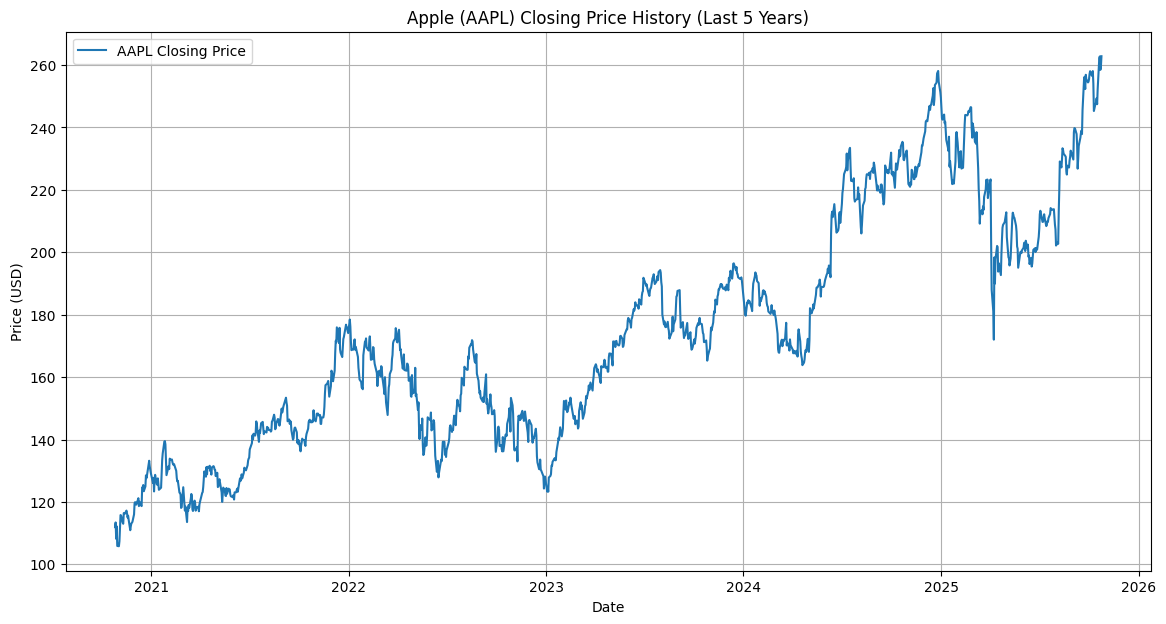

In [14]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.title('Apple (AAPL) Closing Price History (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

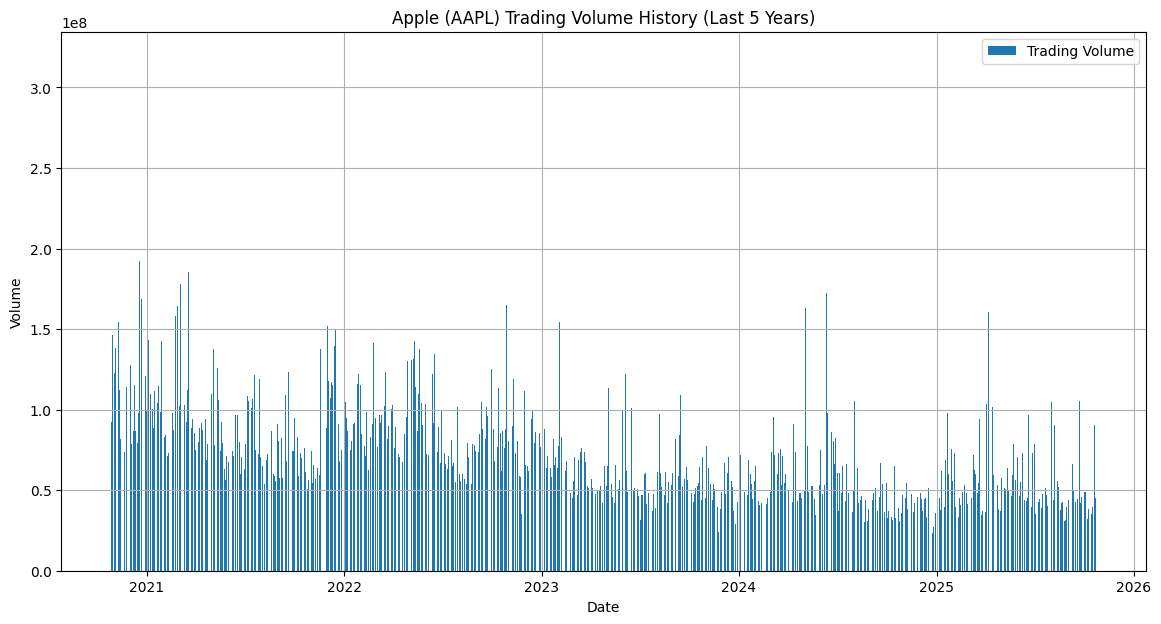

In [15]:
# Plotting the trading volume
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], label='Trading Volume')
plt.title('Apple (AAPL) Trading Volume History (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

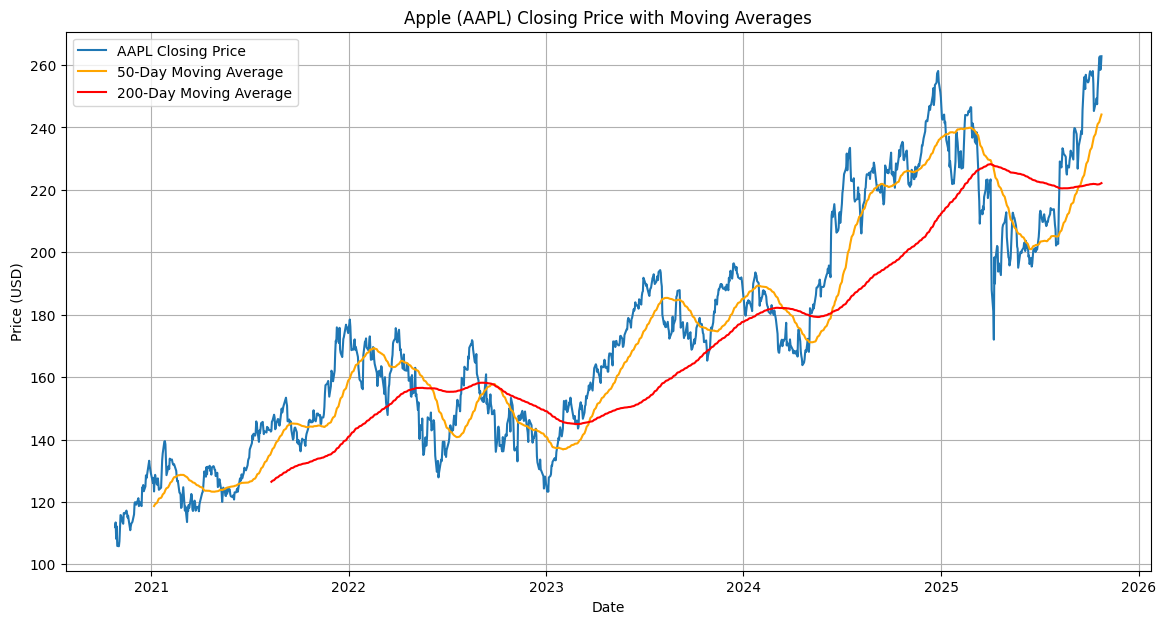

In [16]:
# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plotting the closing price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='AAPL Closing Price')
plt.plot(df['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(df['MA200'], label='200-Day Moving Average', color='red')
plt.title('Apple (AAPL) Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

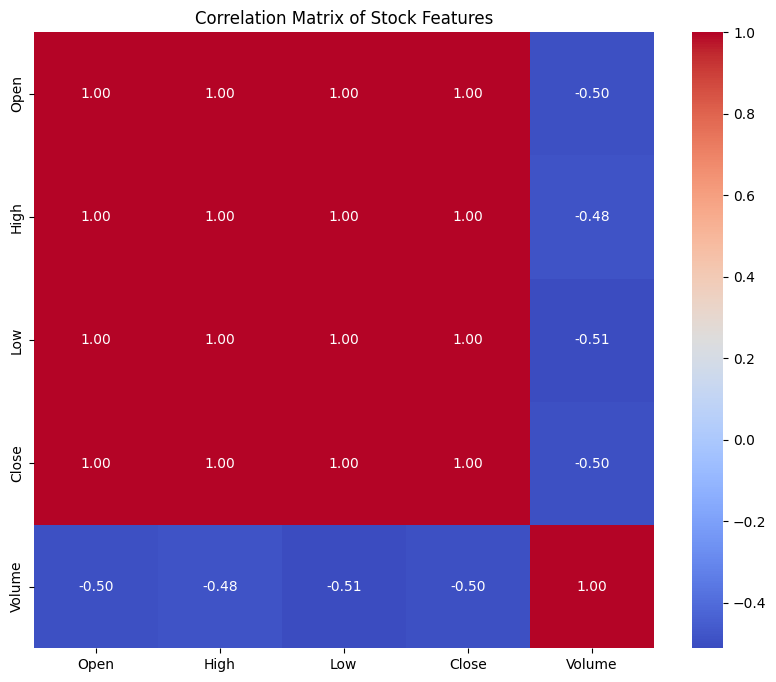

In [19]:
# Calculate the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Features')
plt.show()

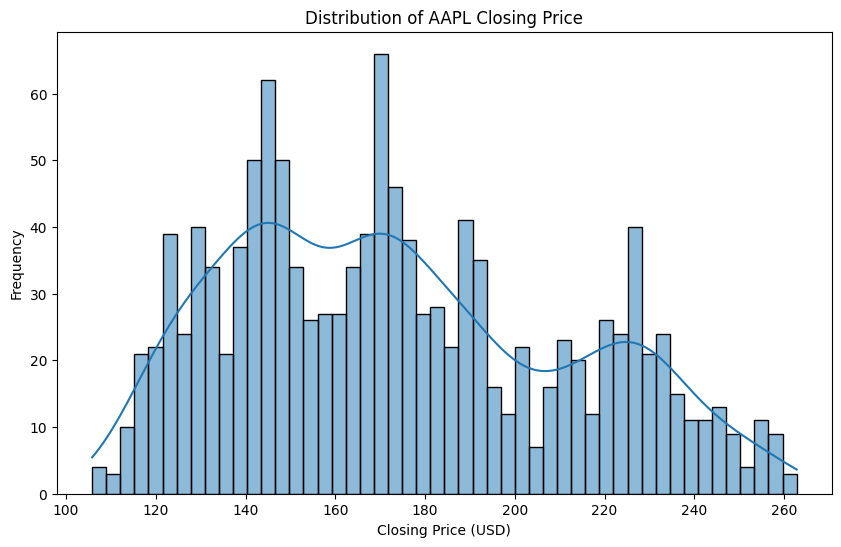

In [20]:
# Plotting the distribution of the closing price
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of AAPL Closing Price')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [30]:
# We create a new column 'Prediction' by shifting the 'Close' column upwards by one day.
df['Prediction'] = df['Close'].shift(-1)

# 2. Handle the New NaN Value
# The last row will have a NaN value in the 'Prediction' column because there's no next day.
# We need to drop this row before training the model.
df.dropna(inplace=True)

# 3. Redefine Features (X) and Target (y)
# Now, our features include 'Close' because today's close is a very important predictor for tomorrow's close.
# Our target 'y' is the new 'Prediction' column.
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Prediction'

X = df[features]
y = df[target]

# We'll use the first 80% of the data for training and the most recent 20% for testing.
split_point = int(len(X) * 0.8)

X_train = X[:split_point]
X_test = X[split_point:]

y_train = y[:split_point]
y_test = y[split_point:]

# Print the shapes and date ranges to confirm the split
print("--- Data Shapes After Splitting ---")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print(f"\nTraining data goes from {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing data goes from {X_test.index.min()} to {X_test.index.max()}")

--- Data Shapes After Splitting ---
Shape of X_train: (844, 5)
Shape of X_test: (212, 5)
Shape of y_train: (844,)
Shape of y_test: (212,)

Training data goes from 2021-08-11 00:00:00-04:00 to 2024-12-17 00:00:00-05:00
Testing data goes from 2024-12-18 00:00:00-05:00 to 2025-10-23 00:00:00-04:00


In [31]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("\nModel training complete.")


Model training complete.


In [33]:
from sklearn.metrics import r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

# You can also look at the model's coefficients
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Mean Squared Error (MSE): 21.207396834847398
Root Mean Squared Error (RMSE): 4.6051489481717525
R-squared (R2) Score: 0.9467231806650922

Model Coefficients: [-1.27523581e-01  6.03088520e-02  1.44754171e-01  9.20365593e-01
 -1.86731165e-09]
Model Intercept: 0.7591535540432801


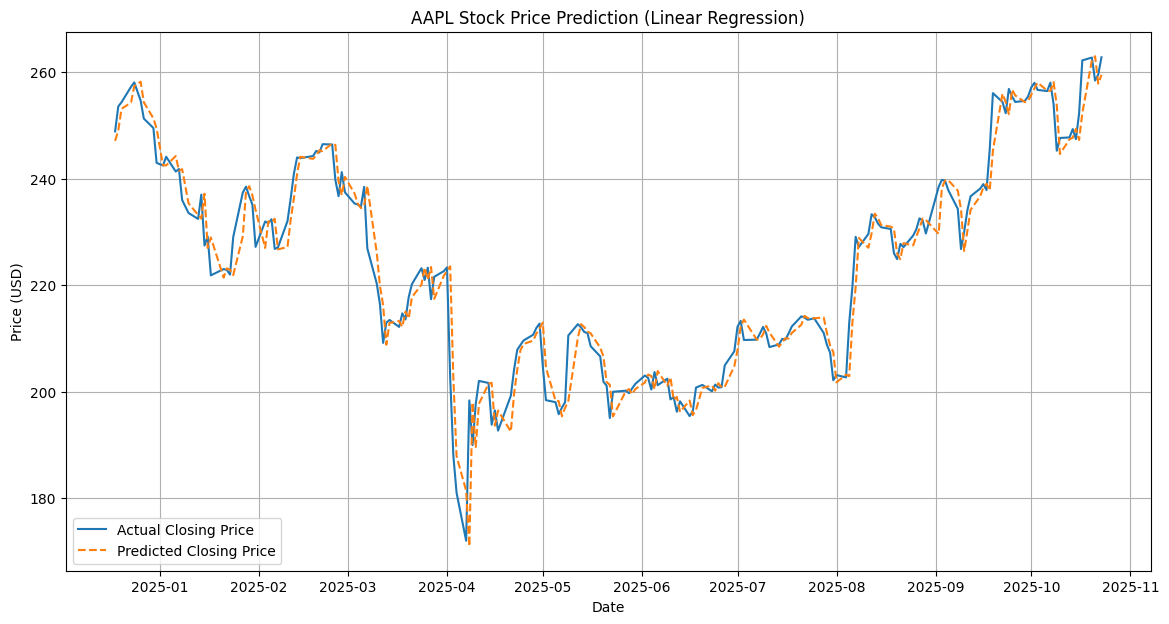

In [35]:
# Create a new DataFrame for plotting
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results = results.sort_index() # Sort by date for a time-series plot

plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual Closing Price')
plt.plot(results['Predicted'], label='Predicted Closing Price', linestyle='--')
plt.title('AAPL Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
comparison_df = pd.DataFrame({
    'Actual Future Price': y_test,
    'Predicted Future Price': y_pred
})

# Add a new column to calculate the daily error (difference)
comparison_df['Error (USD)'] = comparison_df['Actual Future Price'] - comparison_df['Predicted Future Price']

# Display the first 10 predictions to see how the model did
print("--- Side-by-Side Comparison of Actual vs. Predicted Prices ---")
print(comparison_df.head(10))

#last 10 predictions
print("\n--- Last 10 Predictions in the Test Set ---")
print(comparison_df.tail(10))

--- Side-by-Side Comparison of Actual vs. Predicted Prices ---
                           Actual Future Price  Predicted Future Price  \
Date                                                                     
2024-12-18 00:00:00-05:00           248.906403              247.115294   
2024-12-19 00:00:00-05:00           253.589798              249.064773   
2024-12-20 00:00:00-05:00           254.367035              253.123206   
2024-12-23 00:00:00-05:00           257.286682              254.340852   
2024-12-24 00:00:00-05:00           258.103729              257.388662   
2024-12-26 00:00:00-05:00           254.685883              258.241182   
2024-12-27 00:00:00-05:00           251.307877              254.369712   
2024-12-30 00:00:00-05:00           249.534180              251.339313   
2024-12-31 00:00:00-05:00           242.987427              249.469231   
2025-01-02 00:00:00-05:00           242.499161              242.510608   

                           Error (USD)  
Date   